In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#读取数据

data = pd.read_csv(r'C:\Users\123\Desktop\CDNOW(1).txt',sep = '\s+',
                header=None,names = ['userID','date','order','money'],
                dtype = {'userID':str})
# data = pd.DataFrame(data,columns = ['用户ID','购买日期','订单数','订单金额'])
data['date'] = pd.to_datetime(data['date'],format = '%Y%m%d')
print(data['date'].dtype)
print(data['date'].head())
data.head()

datetime64[ns]
0   1997-01-01
1   1997-01-12
2   1997-01-12
3   1997-01-02
4   1997-03-30
Name: date, dtype: datetime64[ns]


,userID,date,order,money
0,00001,1997-01-01,1,11.77
1,00002,1997-01-12,1,12.00
2,00002,1997-01-12,5,77.00
3,00003,1997-01-02,2,20.76
4,00003,1997-03-30,2,20.76


In [3]:
#缺失值查看
print(data.describe())
print('\n')
print(data.info())
#总订单数
print(data['order'].sum())
#总订单金额
print(data['money'].sum())

              order         money
count  69659.000000  69659.000000
mean       2.410040     35.893648
std        2.333924     36.281942
min        1.000000      0.000000
25%        1.000000     14.490000
50%        2.000000     25.980000
75%        3.000000     43.700000
max       99.000000   1286.010000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
userID    69659 non-null object
date      69659 non-null datetime64[ns]
order     69659 non-null int64
money     69659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.1+ MB
None
167881
2500315.6300000004


AxesSubplot(0.125,0.125;0.775x0.755)


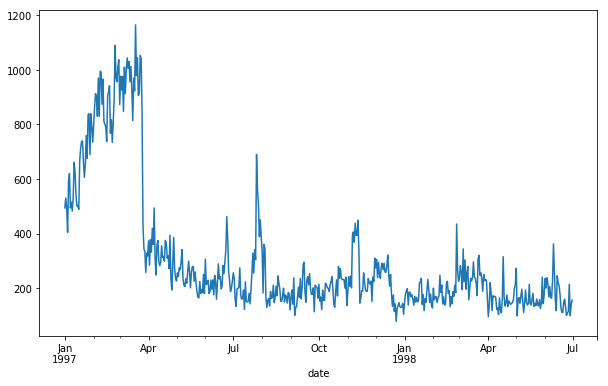

In [4]:
#订单数量趋势分析
fig = plt.figure(figsize = (10,6))
print(data.groupby('date')['order'].sum().plot())
# 订单量第一季度呈快速上升趋势，在四月分明显下跌，后趋于平缓

AxesSubplot(0.125,0.125;0.775x0.755)


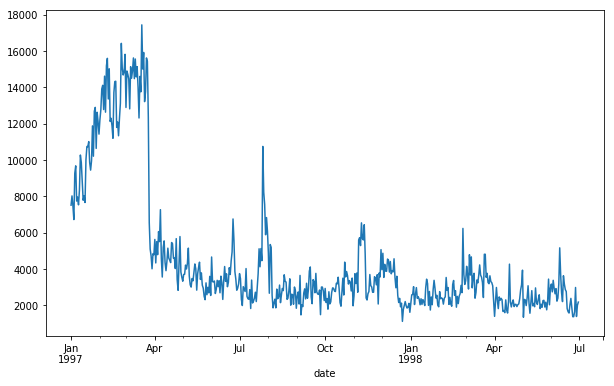

In [5]:
#订单金额趋势分析
fig = plt.figure(figsize = (10,6))
print(data.groupby('date')['money'].sum().plot())
# 订单金额同上

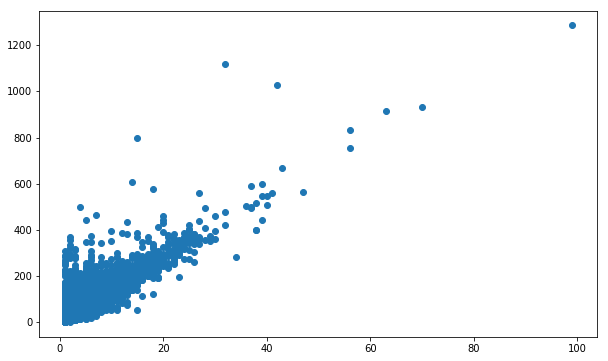

In [6]:
# 异常值检测
fig = plt.figure(figsize = (10,6))
plt.scatter(x = data['order'],y = data['money'])
#整体订单量和金额，基本无异常值

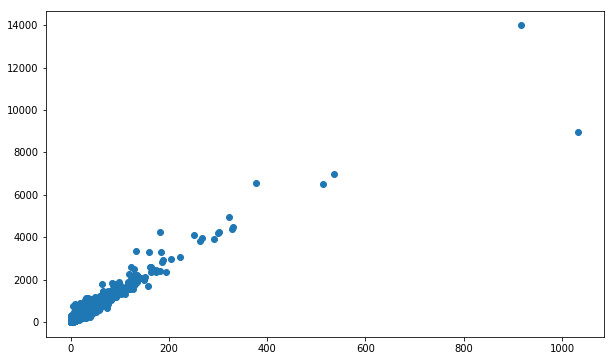

In [7]:
fig = plt.figure(figsize = (10,6))
data2 = data.groupby('userID').sum()
plt.scatter(x = data2['order'],y = data2['money'])
# 以单个用户为基本单位，基本无异常值

(array([2.1622e+04, 1.3320e+03, 3.2800e+02, 1.2800e+02, 6.4000e+01,
        3.3000e+01, 1.9000e+01, 1.0000e+01, 9.0000e+00, 3.0000e+00,
        4.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0.    ,   279.8186,   559.6372,   839.4558,  1119.2744,
         1399.093 ,  1678.9116,  1958.7302,  2238.5488,  2518.3674,
         2798.186 ,  3078.0046,  3357.8232,  3637.6418,  3917.4604,
         4197.279 ,  4477.0976,  4756.9162,  5036.7348,  5316.5534,
         5596.372 ,  5876.1906,  6156.0092,  6

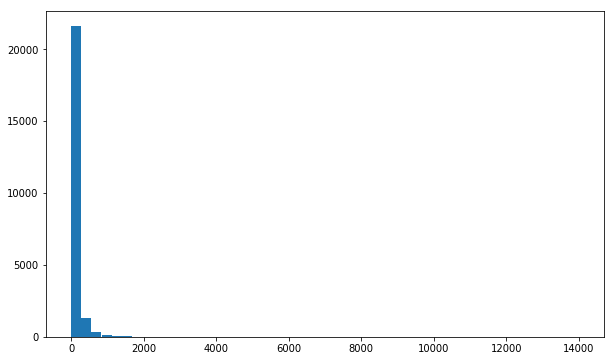

In [8]:
fig = plt.figure(figsize = (10,6))
data2 = data.groupby('userID').sum()
plt.hist(data2['money'],bins = 50)
# 高价值用户还是很少的（符合二八定律）

In [9]:
#各用户 购买数量分析
print(data.groupby('userID')['order'].count().head())
#各用户 购买数量累计贡献分析
#各用户 最大单笔购买数量分析
print(data.groupby('userID')['order'].max().head(10))
max_o = data.groupby('userID')['order'].max()
max_o.sort_values(ascending=False).head(10)
# 单笔购买数量最大的前十位用户

userID
00001     1
00002     2
00003     6
00004     4
00005    11
Name: order, dtype: int64
userID
00001    1
00002    5
00003    5
00004    2
00005    4
00006    1
00007    9
00008    7
00009    2
00010    3
Name: order, dtype: int64


userID
08830    99
23474    70
22279    63
08529    56
07592    47
10550    43
14894    42
01412    41
15003    40
15238    39
Name: order, dtype: int64

In [10]:
#各用户 购买金额分析
print(data.groupby('userID')['money'].count().head())
#各用户 购买金额累计贡献分析
#各用户 最大单笔消费金额分析
print(data.groupby('userID')['money'].max().head(10))
max_m = data.groupby('userID')['money'].max()
max_m.sort_values(ascending=False).head(10)
# 单笔消费金额最大的前十位用户

userID
00001     1
00002     2
00003     6
00004     4
00005    11
Name: money, dtype: int64
userID
00001     11.77
00002     77.00
00003     57.45
00004     29.73
00005     46.46
00006     20.99
00007    138.50
00008     50.43
00009     41.98
00010     39.31
Name: money, dtype: float64


userID
08830    1286.01
18847    1119.68
14894    1028.51
23474     932.23
22279     915.10
08529     756.47
10550     669.93
12304     606.55
03537     597.61
10197     587.63
Name: money, dtype: float64

In [11]:
# 各用户购买次数分析
data.groupby('userID').count().head()

,date,order,money
userID,,,
00001,1,1,1
00002,2,2,2
00003,6,6,6
00004,4,4,4
00005,11,11,11


In [12]:
# 各用户第一次购买时间分析
data3 = data.groupby('userID')['date'].min()
print(data3.head())
data4 = pd.DataFrame(data = data3,columns = ['date'])
data4.reset_index(inplace = True)
print(data4.head())
data4.set_index('date').resample('M',closed = 'left',
                                label = 'right').count()
# 用户首次购买均发生在97年的1-3月份

userID
00001   1997-01-01
00002   1997-01-12
00003   1997-01-02
00004   1997-01-01
00005   1997-01-01
Name: date, dtype: datetime64[ns]
  userID       date
0  00001 1997-01-01
1  00002 1997-01-12
2  00003 1997-01-02
3  00004 1997-01-01
4  00005 1997-01-01


,userID
date,
1997-01-31,7579
1997-02-28,8456
1997-03-31,7535


userID
00001   1997-01-01
00002   1997-01-12
00003   1998-05-28
00004   1997-12-12
00005   1998-01-03
Name: date, dtype: datetime64[ns]
            userID
date              
1997-01-31    4192
1997-02-28    4912
1997-03-31    4478
1997-04-30     677
1997-05-31     480
1997-06-30     499
1997-07-31     493
1997-08-31     384
1997-09-30     397
1997-10-31     455
1997-11-30     609
1997-12-31     620
1998-01-31     514
1998-02-28     550
1998-03-31     993
1998-04-30     769
1998-05-31    1042
1998-06-30    1506


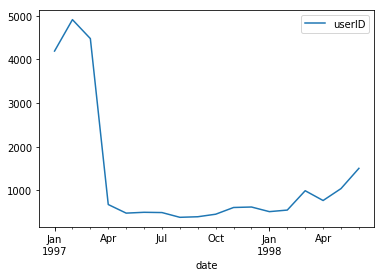

In [13]:
# 各用户最后一次购买时间分析
data3 = data.groupby('userID')['date'].max()
print(data3.head())
data4 = pd.DataFrame(data = data3,columns = ['date'])
data5 = data4.reset_index().set_index('date').resample('M').count()
print(data5)
data5.plot()

In [14]:
# 最后一次消费与当前时间间隔

userID
00001     0 days
00002     0 days
00003   511 days
00004   345 days
00005   367 days
00006     0 days
00007   445 days
00008   452 days
00009   523 days
00010     0 days
Name: date, dtype: timedelta64[ns]
count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: date, dtype: object
timedelta64[ns]

--------用户平均生命周期--------
134 days 20:55:36.987696


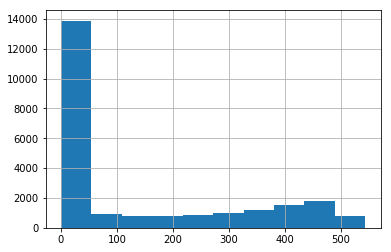

In [15]:
# 用户生命周期分析
last = data.groupby('userID')['date'].max()
first = data.groupby('userID')['date'].min()
live = last-first
print(live.head(10))
# plt.hist(live,bins = 20)
print(live.describe())
print(live.dtype)
print('\n--------用户平均生命周期--------')
print(live.mean())
(live/np.timedelta64(1,'D')).hist(bins = 10)
#注意这里要转换格式
# 大部分用户的生命周期都很短，在零附近
# 首次购买后就流失，少量用户留存

In [16]:
# 用户首次回购周期
first2 = pd.DataFrame(data = first,columns = ['date'])
mg = pd.merge(data,first2,left_on = 'userID',
         right_on = 'userID',how = 'left')
print(mg.head())
mg['delta'] = mg['date_x'] - mg['date_y']
print(mg.head(10))

  userID     date_x  order  money     date_y
0  00001 1997-01-01      1  11.77 1997-01-01
1  00002 1997-01-12      1  12.00 1997-01-12
2  00002 1997-01-12      5  77.00 1997-01-12
3  00003 1997-01-02      2  20.76 1997-01-02
4  00003 1997-03-30      2  20.76 1997-01-02
  userID     date_x  order  money     date_y    delta
0  00001 1997-01-01      1  11.77 1997-01-01   0 days
1  00002 1997-01-12      1  12.00 1997-01-12   0 days
2  00002 1997-01-12      5  77.00 1997-01-12   0 days
3  00003 1997-01-02      2  20.76 1997-01-02   0 days
4  00003 1997-03-30      2  20.76 1997-01-02  87 days
5  00003 1997-04-02      2  19.54 1997-01-02  90 days
6  00003 1997-11-15      5  57.45 1997-01-02 317 days
7  00003 1997-11-25      4  20.96 1997-01-02 327 days
8  00003 1998-05-28      1  16.99 1997-01-02 511 days
9  00004 1997-01-01      2  29.33 1997-01-01   0 days


In [17]:
mg2 = pd.DataFrame(mg,columns = ['userID','delta'])
print(mg2.head(10))

print('\n----将delta格式改成数值-----\n')
#将delta格式改成数值
a = lambda x:x/np.timedelta64(1,'D')
mg2['delta'] = mg2['delta'].apply(a)
print(mg2.head(10))

print('\n------分箱------\n')
bins = [0,3,7,15,30,60,90,180,365]
mg2['bin'] = pd.cut(mg2.delta,bins = bins)
print(mg2.head(10))

  userID    delta
0  00001   0 days
1  00002   0 days
2  00002   0 days
3  00003   0 days
4  00003  87 days
5  00003  90 days
6  00003 317 days
7  00003 327 days
8  00003 511 days
9  00004   0 days

----将delta格式改成数值-----

  userID  delta
0  00001    0.0
1  00002    0.0
2  00002    0.0
3  00003    0.0
4  00003   87.0
5  00003   90.0
6  00003  317.0
7  00003  327.0
8  00003  511.0
9  00004    0.0

------分箱------

  userID  delta         bin
0  00001    0.0         NaN
1  00002    0.0         NaN
2  00002    0.0         NaN
3  00003    0.0         NaN
4  00003   87.0    (60, 90]
5  00003   90.0    (60, 90]
6  00003  317.0  (180, 365]
7  00003  327.0  (180, 365]
8  00003  511.0         NaN
9  00004    0.0         NaN


            userID
bin               
(0, 3]         682
(3, 7]         887
(7, 15]       1635
(15, 30]      2602
(30, 60]      4087
(60, 90]      3099
(90, 180]     8247
(180, 365]   14790
              userID
bin                 
(0, 3]      0.018929
(3, 7]      0.024619
(7, 15]     0.045380
(15, 30]    0.072220
(30, 60]    0.113436
(60, 90]    0.086014
(90, 180]   0.228899
(180, 365]  0.410503


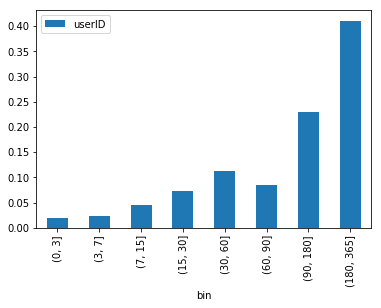

In [18]:
mg2_pi = pd.pivot_table(mg2,values = 'userID',index = 'bin',
              aggfunc = 'count')
print(mg2_pi)
mg2_pi['userID'] = mg2_pi['userID']/mg2_pi['userID'].sum()
# mg2_pi.plot.bar()
print(mg2_pi)
mg2_pi.plot.bar()
# 在(0,3]内进行复购的用户约2%-3%，约3成用户在一年内会再次购买，
# 其中半年到一年内购买的占25%以上
# print(mg2.head(10))

In [19]:
print(mg2.head(10))
a = lambda x:x-x.shift(-1)
mg3 = mg2.groupby('userID')['delta'].apply(a)
print(mg3.head(10))
# 用户平均购买周期为约69天
print(mg3.mean())

  userID  delta         bin
0  00001    0.0         NaN
1  00002    0.0         NaN
2  00002    0.0         NaN
3  00003    0.0         NaN
4  00003   87.0    (60, 90]
5  00003   90.0    (60, 90]
6  00003  317.0  (180, 365]
7  00003  327.0  (180, 365]
8  00003  511.0         NaN
9  00004    0.0         NaN
0      NaN
1      0.0
2      NaN
3    -87.0
4     -3.0
5   -227.0
6    -10.0
7   -184.0
8      NaN
9    -17.0
Name: delta, dtype: float64
-68.97376814424265


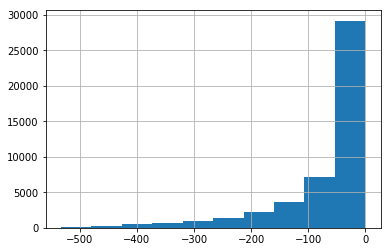

In [20]:
mg3.hist()

In [21]:
# 各月复购率
data['month'] = data['date'].astype('datetime64[M]')
# 转换频率！！
print(data.head())
table = pd.pivot_table(data,values = 'date',index = 'userID',
              columns = 'month',aggfunc = 'count').fillna(0)
print(table.head(2))

table2 = table.applymap(
    lambda x:1 if x>1 else np.nan if x==0 else 0)
table2.head()

  userID       date  order  money      month
0  00001 1997-01-01      1  11.77 1997-01-01
1  00002 1997-01-12      1  12.00 1997-01-01
2  00002 1997-01-12      5  77.00 1997-01-01
3  00003 1997-01-02      2  20.76 1997-01-01
4  00003 1997-03-30      2  20.76 1997-03-01
month   1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
userID                                                               
00001          1.0         0.0         0.0         0.0         0.0   
00002          2.0         0.0         0.0         0.0         0.0   

month   1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
userID                                                               
00001          0.0         0.0         0.0         0.0         0.0   
00002          0.0         0.0         0.0         0.0         0.0   

month   1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
userID                                                               
00001          0.0         0

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
userID,,,,,,,,,,,,,,,,,,
00001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00002,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00003,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
00004,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
00005,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


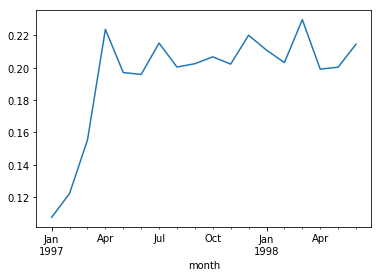

In [22]:
# 各月复购率折线图
# 复购率稳定在20%-22%附近
(table2.sum()/table2.count()).plot()

In [23]:
# 各月回购率
table = pd.pivot_table(data,index = 'userID',
                      values = 'money',columns = 'month',
                      aggfunc = 'mean')
print(table.head(2))
table3 = table.applymap(lambda x: 1 if x>0 else 0)
table3.head()

month   1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
userID                                                               
00001        11.77         NaN         NaN         NaN         NaN   
00002        44.50         NaN         NaN         NaN         NaN   

month   1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
userID                                                               
00001          NaN         NaN         NaN         NaN         NaN   
00002          NaN         NaN         NaN         NaN         NaN   

month   1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
userID                                                               
00001          NaN         NaN         NaN         NaN         NaN   
00002          NaN         NaN         NaN         NaN         NaN   

month   1998-04-01  1998-05-01  1998-06-01  
userID                                      
00001          NaN         NaN         NaN  
00002          NaN    

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
userID,,,,,,,,,,,,,,,,,,
00001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00002,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00003,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
00004,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
00005,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [32]:
def tt(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.nan)
    status.append(np.nan)
    return pd.Series(status,index = table3.columns)


returnd = table3.apply(tt,axis = 1)
# pd.Series(data = returnd,index = ['userID'],
#           columns = table3.columns)
print(returnd.head())
a = table3.columns
# returnd = pd.DataFrame(data = returnd,columns = a)
# returnd.head()

month   1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
userID                                                               
00001          0.0         NaN         NaN         NaN         NaN   
00002          0.0         NaN         NaN         NaN         NaN   
00003          0.0         NaN         1.0         0.0         NaN   
00004          0.0         NaN         NaN         NaN         NaN   
00005          1.0         0.0         NaN         1.0         1.0   

month   1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
userID                                                               
00001          NaN         NaN         NaN         NaN         NaN   
00002          NaN         NaN         NaN         NaN         NaN   
00003          NaN         NaN         NaN         NaN         NaN   
00004          NaN         NaN         0.0         NaN         NaN   
00005          1.0         0.0         NaN         0.0         NaN   

month   1997-11-01

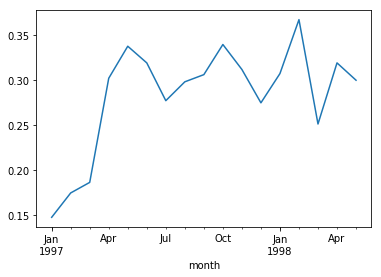

In [33]:
(returnd.sum()/returnd.count()).plot()
# 回购率在25%-35%的区间内

In [26]:
# 各月留存率

In [37]:
# 用户分层
def user_status(data):
    user = []
    for i in range(18):        
        if data[i] == 0:
            if len(user) > 0:
                if data[i-1] == 'unknow':
                    user.append('unknow')
                else:
                    user.append('Inactives')                
            else:
                user.append('unknow')
        else:
            if len(user) == 0:
                user.append('new user')
            else:
                if data[i-1] == 'Inactives':
                    user.append('return')  
                elif data[i-1] == 'unknow':
                    user.append('new user')
                else:
                    user.append('actives')
        
    return pd.Series(user,index = table3.columns)
status =  table3.apply(lambda x: user_status(x),axis = 1)    
status.head()
# 不知道哪里错了，不会做了

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
userID,,,,,,,,,,,,,,,,,,
00001,new user,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives
00002,new user,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives
00003,new user,Inactives,actives,actives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,actives,Inactives,Inactives,Inactives,Inactives,Inactives,actives,Inactives
00004,new user,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives,actives,Inactives,Inactives,Inactives,actives,Inactives,Inactives,Inactives,Inactives,Inactives,Inactives
00005,new user,actives,Inactives,actives,actives,actives,actives,Inactives,actives,Inactives,Inactives,actives,actives,Inactives,Inactives,Inactives,Inactives,Inactives
